In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import numpy as np

file_path = '/Users/wuyucui/Code/bdm-project/cleaned_data.json/part-00000-08cbe70e-b89e-46e7-a3c4-8d64bb9faf7a-c000.json'
# 读取JSON文件
data = []
with open(file_path, 'r') as file:
    for line in file.readlines():
        json_obj = json.loads(line)
        data.append(json_obj)

# 提取filtered_words字段
filtered_words_list = [entry['filtered_words'] for entry in data]

# 将文本数据转换成TF-IDF特征表示
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([" ".join(words) for words in filtered_words_list])

# 将稀疏矩阵转换成稠密矩阵
dense_tfidf_matrix = tfidf_matrix.toarray()

print(dense_tfidf_matrix.shape)  # 输出稠密TF-IDF转换后的矩阵形状
print(dense_tfidf_matrix)  # 输出稠密TF-IDF转换后的矩阵内容

(651, 10862)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/Users/wuyucui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wuyucui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wuyucui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wuyucui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

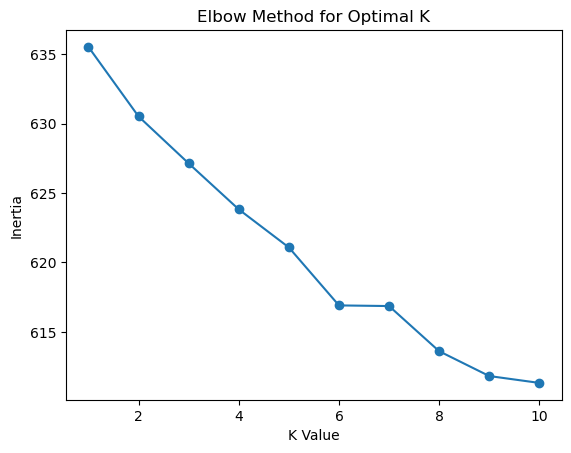

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 通过肘法确定K值，尝试不同的K值进行聚类
inertias = []
ks = range(1, 11)  # 从1到10尝试不同的K值
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dense_tfidf_matrix)
    inertias.append(kmeans.inertia_)

# 绘制肘部图表
plt.figure()
plt.plot(ks, inertias, marker='o')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [6]:
from sklearn.decomposition import PCA

# 使用PCA进行降维
pca = PCA(n_components=0.95)  # 保留95%的方差
tfidf_pca = pca.fit_transform(dense_tfidf_matrix)

print("Reduced Dimension after PCA:", tfidf_pca.shape)

Reduced Dimension after PCA: (651, 569)


In [7]:
from sklearn.cluster import KMeans

# 使用K均值聚类算法，假设K=6
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_pca)

# 输出每个数据点的聚类标签
print("Cluster Labels:")
print(cluster_labels)

# 输出每个聚类中心的坐标
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Labels:
[5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 2 4 5 4 5 5 5 5 5 5 5 2 5 5 5 5 5 2 2 5
 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 3 5 5 5 1 5 5 5 5 5 5 5 5 5 5
 5 5 5 3 5 5 5 5 5 3 5 2 5 5 5 5 5 5 0 4 5 5 5 3 0 5 4 5 3 5 5 3 5 5 1 4 5
 5 2 5 1 5 4 5 5 4 0 5 5 3 0 5 3 5 5 3 3 5 5 5 3 5 5 4 5 5 3 5 1 0 2 4 3 5
 5 3 3 5 5 5 5 5 5 1 2 5 4 5 5 4 3 5 5 5 4 5 3 5 3 1 5 4 5 5 5 5 5 5 5 3 5
 5 4 3 5 5 5 3 5 5 4 5 4 4 0 5 3 5 5 3 3 1 5 1 4 5 5 5 5 0 3 3 5 1 5 0 5 5
 3 0 5 4 5 3 5 1 4 5 4 4 5 5 5 5 4 5 5 5 5 0 4 0 4 5 5 5 5 5 5 5 5 5 4 0 3
 5 5 5 5 4 4 5 4 5 5 4 5 3 5 3 4 5 5 4 5 3 0 5 5 5 3 5 5 5 5 5 5 5 4 5 5 5
 3 5 5 5 3 5 5 1 5 4 5 5 5 3 5 3 5 5 3 4 3 3 3 3 3 5 0 5 4 0 5 3 5 5 5 4 1
 3 5 4 5 5 3 3 4 5 5 1 5 5 5 5 5 4 5 5 5 4 5 4 5 5 3 0 5 2 0 2 3 5 4 5 4 5
 5 4 5 1 4 5 3 5 4 4 4 3 5 4 3 4 4 5 5 2 0 4 0 5 4 4 5 4 4 5 2 4 5 4 1 5 3
 5 3 3 3 0 4 5 3 5 4 5 5 5 4 4 1 5 3 5 5 5 4 2 5 2 4 2 3 3 4 5 5 4 5 5 4 5
 3 5 3 3 5 4 3 5 2 1 5 5 5 5 3 5 0 3 3 5 3 5 5 5 1 4 3 5 0 0 5 2 4 5 4 3 4
 4 4 0 4 

/Users/wuyucui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


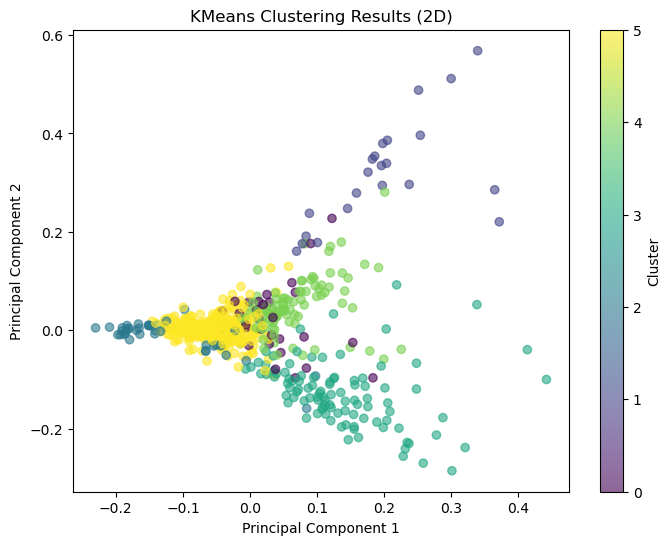

In [8]:
import matplotlib.pyplot as plt

# 绘制二维散点图
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.6)
plt.title('KMeans Clustering Results (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

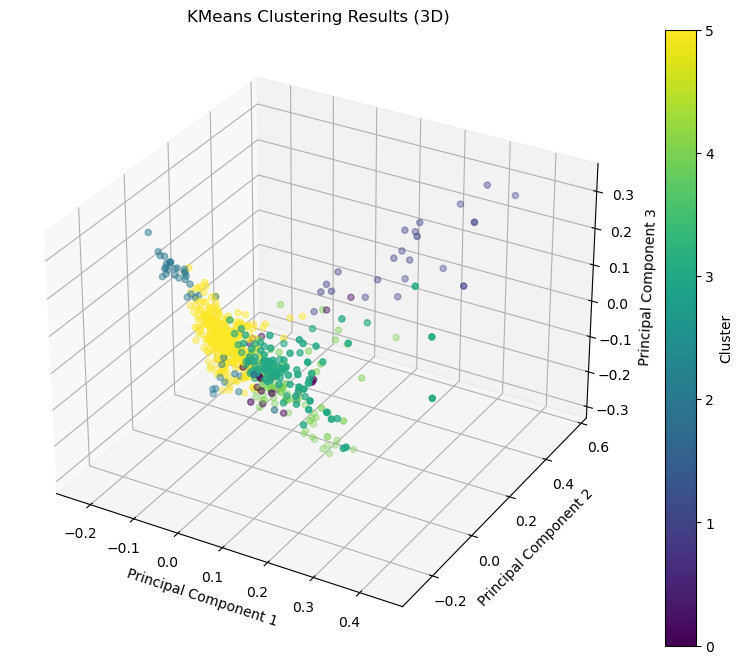

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# 绘制三维散点图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], tfidf_pca[:, 2], c=cluster_labels, cmap='viridis', marker='o')
ax.set_title('KMeans Clustering Results (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, label='Cluster')
plt.show()

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
titles = [entry['title'] for entry in data]

# 对标题进行TF-IDF向量化
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(titles)

def get_recommendations(query, data, tfidf_matrix, tfidf_vectorizer):
    # 对用户输入的查询进行TF-IDF向量转换
    query_vector = tfidf_vectorizer.transform([query])

    # 计算查询与每个文档标题的余弦相似度
    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # 找到相似度最高的前5个文档索引
    top5_indexes = similarities.argsort()[-6:-1][::-1]

    # 返回相似度top5的文档标题
    recommended_titles = [data[i]['title'] for i in top5_indexes]

    return recommended_titles

# 用户输入查询
user_query = "medical data mining"

# 获取推荐文档标题
recommended_titles = get_recommendations(user_query, data, tfidf_matrix, tfidf_vectorizer)

print("recommend top 5 docs:")
for i, title in enumerate(recommended_titles):
    print(f"{i+1}. {title}")

recommend top 5 docs:
1. Traffic accident in Cuiabá-MT: an analysis through the data mining technology.
2. A Data Mining Approach to Identify Sexuality Patterns in a Brazilian University Population.
3. Discovering Psychological Principles by Mining Naturally Occurring Data Sets
4. Building knowledge for poison control: the novel pairing of communication analysis with data mining methods
5. Development of a medical module for disaster information systems.
